# Stefanidis et al. 2021 recook

ToDo:
- preliminary data analysis
- run data through VIF check
- run BRT model
- run GAMLSS model
- plot output as was done!

In [3]:
import numpy as np
import pandas as pd

In [35]:
ERA5meta = pd.read_csv("../annotatedDATA/META/ERA5_META.csv")

In [4]:
CARIACO = pd.read_csv("../DATA/January/Combined_CARIACO_data_v6.csv")

CARIACO.columns.values

array(['Unnamed: 0', 'cdww', 'iews', 'inss', 'mcc', 'mwp', 'si10', 'sp',
       'sst', 't2m', 'tauoc', 'u10', 'ust', 'v10', 'v10n', 'vst', 'wind',
       'time_month', 'cdir', 'e', 'ewss', 'i10fg', 'lsp', 'magss', 'mer',
       'metss', 'mmtss', 'mntss', 'mtpr', 'nsss', 'sshf', 'tp', 'NO3_UDO',
       'PO4_UDO', 'SiO4_UDO', 'NH4_USF', 'NO2_USF', 'NO3_NO2_USF',
       'PO4_USF', 'SiO4_USF', 'pH_corrected', 'Salinity_bottles',
       'Temperature', 'Sigma_t', 'PrimaryProductivity', 'Chlorophyll',
       'Phaeopigments', 'NO3_USF', 'NO3_UDO_35m', 'PO4_UDO_35m',
       'SiO4_UDO_35m', 'NH4_USF_35m', 'NO2_USF_35m', 'NO3_NO2_USF_35m',
       'PO4_USF_35m', 'SiO4_USF_35m', 'pH_corrected_35m',
       'Salinity_bottles_35m', 'Temperature_35m', 'Sigma_t_35m',
       'PrimaryProductivity_35m', 'Chlorophyll_35m', 'Phaeopigments_35m',
       'NO3_USF_35m', 'NO3_UDO_35to100m', 'PO4_UDO_35to100m',
       'SiO4_UDO_35to100m', 'NH4_USF_35to100m', 'NO2_USF_35to100m',
       'NO3_NO2_USF_35to100m', 'PO4_

In [13]:
CARIACO['date'] = pd.to_datetime(CARIACO['time_month'])
CARIACO = CARIACO.set_index('date')

In [139]:
ERA5 = CARIACO[['cdww', 'iews', 'inss', 'mcc', 'mwp', 'si10', 'sp',
       'sst', 't2m', 'tauoc', 'u10', 'ust', 'v10', 'v10n', 'vst', 'wind',
    'cdir', 'e', 'ewss', 'i10fg', 'lsp', 'magss', 'mer',
       'metss', 'mmtss', 'mntss', 'mtpr', 'nsss', 'sshf', 'tp',
        ]].dropna()

In [140]:
ERA5['year'] = ERA5.index.year

<AxesSubplot:title={'center':'u10'}, xlabel='year'>

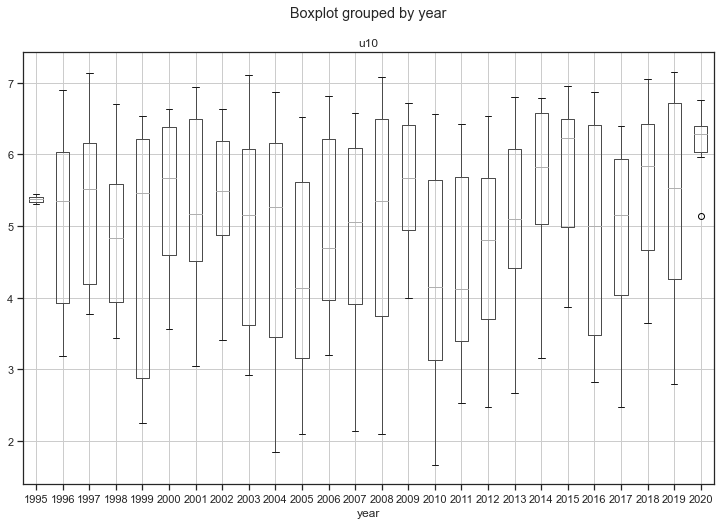

In [141]:
ERA5.boxplot('u10', by='year', figsize=(12, 8))

<AxesSubplot:title={'center':'tp'}, xlabel='year'>

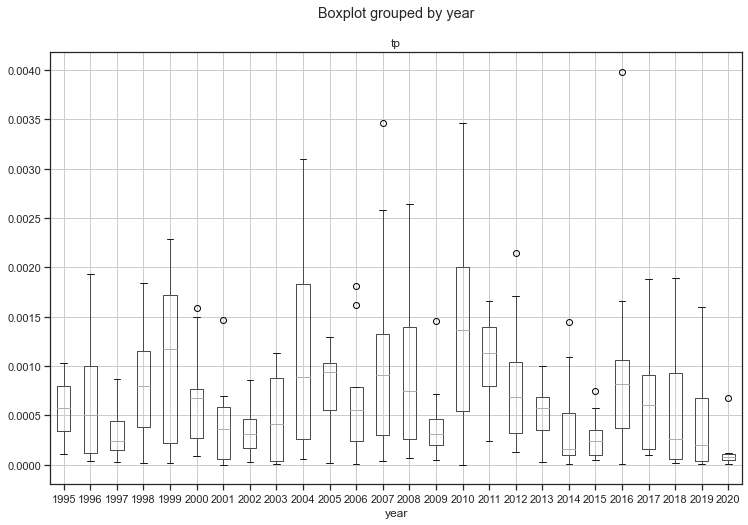

In [137]:
ERA5.boxplot('tp', by='year', figsize=(12, 8))

In [80]:
ERA5.columns


Index(['cdww', 'iews', 'inss', 'mcc', 'mwp', 'si10', 'sp', 'sst', 't2m',
       'tauoc', 'u10', 'ust', 'v10', 'v10n', 'vst', 'wind', 'time_month',
       'cdir', 'e', 'ewss', 'i10fg', 'lsp', 'magss', 'mer', 'metss', 'mmtss',
       'mntss', 'mtpr', 'nsss', 'sshf', 'tp', 'year'],
      dtype='object')

In [79]:
ERA5meta[['GRIB_name', 'GRIB_cfVarName', 'GRIB_units']]

,GRIB_name,GRIB_cfVarName,GRIB_units
0,10 metre U wind component,u10,m s**-1
1,Neutral wind at 10 m v-component,v10n,m s**-1
2,10 metre V wind component,v10,m s**-1
3,10 metre wind speed,si10,m s**-1
4,Instantaneous 10 metre wind gust,i10fg,m s**-1
5,Mean wave period,mwp,s
6,Coefficient of drag with waves,cdww,dimensionless
7,Instantaneous eastward turbulent surface stress,iews,N m**-2
8,Instantaneous northward turbulent surface stress,inss,N m**-2
9,Eastward turbulent surface stress,ewss,N m**-2 s


# YEAR BY YEAR ANOVA

to check for long term climatic trends and interannual variability

In [81]:
from scipy import stats

yrs = pd.unique(ERA5['year'])

era5vars = ['cdww', 'iews', 'inss', 'mcc', 'mwp', 'si10', 'sp',
       'sst', 't2m', 'tauoc', 'u10', 'ust', 'v10', 'v10n', 'vst', 'wind',
       'cdir', 'e', 'ewss', 'i10fg', 'lsp', 'magss', 'mer',
       'metss', 'mmtss', 'mntss', 'mtpr', 'nsss', 'sshf', 'tp',
        ]

for era5var in era5vars: 
    d_data = [ERA5[era5var][ERA5['year'] == yr] for yr in yrs]
    F, p = stats.f_oneway(*d_data)
    if p < 0.05:
        print("")
        print("! Significant !")    
    print(ERA5meta[ERA5meta.GRIB_cfVarName == era5var].GRIB_name.values, era5var, "F", F,"  p-value:", p)
    print("")



['Coefficient of drag with waves'] cdww F 0.8065593766809249   p-value: 0.7329388295769894

['Instantaneous eastward turbulent surface stress'] iews F 0.9438337356305955   p-value: 0.5442853789339178

['Instantaneous northward turbulent surface stress'] inss F 0.9141266215541215   p-value: 0.5858628247653361


! Significant !
['Medium cloud cover'] mcc F 2.139726615201977   p-value: 0.0016668261243026668

['Mean wave period'] mwp F 0.7459773685603533   p-value: 0.8070877238018377

['10 metre wind speed'] si10 F 0.960802562070536   p-value: 0.5207144811259024


! Significant !
['Surface pressure'] sp F 1.5944296669035536   p-value: 0.03908024068213381


! Significant !
['Sea surface temperature'] sst F 1.610097794063451   p-value: 0.03600852676646509

['2 metre temperature'] t2m F 1.1635784042683277   p-value: 0.27291845650446056

['Normalized stress into ocean'] tauoc F 0.6213732049585995   p-value: 0.9224385853172873

['10 metre U wind component'] u10 F 1.1777987327641117   p-value: 0

# simple descriptive statistics for chlorophyll

In [92]:
import seaborn
import matplotlib.pyplot as plt

seaborn.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = [15, 5]

In [93]:
CARIACO.Chlorophyll

date
1995-11-01    0.165513
1995-12-01    0.110785
1996-01-01    0.558921
1996-02-01    0.340775
1996-03-01    0.623483
                ...   
2021-07-01         NaN
2021-08-01         NaN
2021-09-01         NaN
2021-10-01         NaN
2021-11-01         NaN
Name: Chlorophyll, Length: 316, dtype: float64

In [94]:
CARIACO.Satellite_chla

date
1995-11-01         NaN
1995-12-01         NaN
1996-01-01         NaN
1996-02-01         NaN
1996-03-01         NaN
                ...   
2021-07-01    0.512693
2021-08-01    0.281842
2021-09-01    0.224667
2021-10-01    0.237703
2021-11-01    0.412240
Name: Satellite_chla, Length: 316, dtype: float64

In [106]:
NISKINmeta = pd.read_csv("../annotatedDATA/META/Niskin_PARAMETERS.csv", sep='\t')
NISKINmeta[NISKINmeta.Parameter=="Chlorophyll"]

,Parameter,Description,Units
80,Chlorophyll,chlorophyll a,milligrams/meter^3 (mg/m^3)


## NISKIN bottle Chlorophyll

Text(0, 0.5, 'Chlorophyll [mg $\\mathrm{m^{-3}}$]')

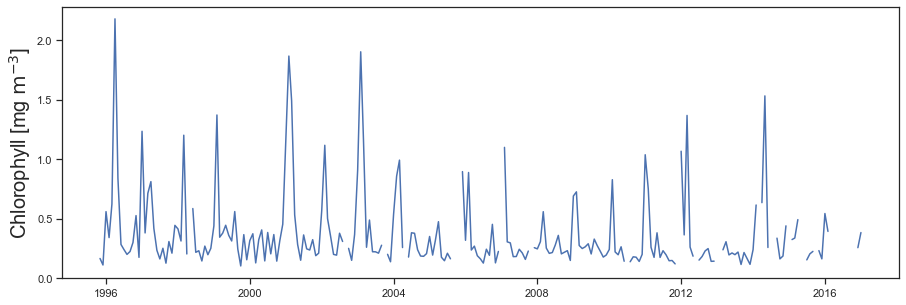

In [108]:
plt.plot(CARIACO.index, CARIACO.Chlorophyll)

plt.ylabel("Chlorophyll [mg $\mathrm{m^{-3}}$]", fontsize=20)

Text(0, 0.5, 'Chlorophyll  [mg $\\mathrm{m^{-3}}$]')

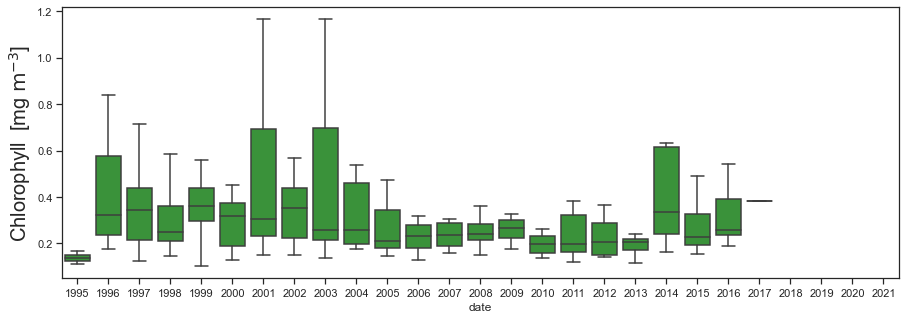

In [109]:
seaborn.boxplot(x=CARIACO.index.year, y=CARIACO.Chlorophyll, color='tab:green', showfliers=False)
#plt.axvline(6, color='red')
plt.ylabel("Chlorophyll  [mg $\mathrm{m^{-3}}$]", fontsize=20)

## top 35 m Chlorophyll

Text(0, 0.5, 'Chlorophyll 35m [mg $\\mathrm{m^{-3}}$]')

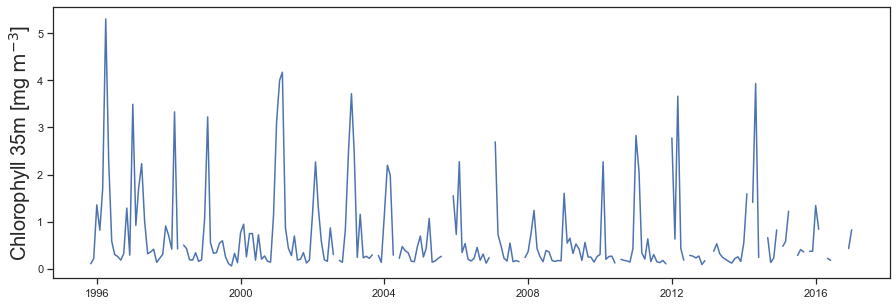

In [113]:
plt.plot(CARIACO.index, CARIACO.Chlorophyll_35m)

plt.ylabel("Chlorophyll 35m [mg $\mathrm{m^{-3}}$]", fontsize=20)

Text(0, 0.5, 'Chlorophyll 35m  [mg $\\mathrm{m^{-3}}$]')

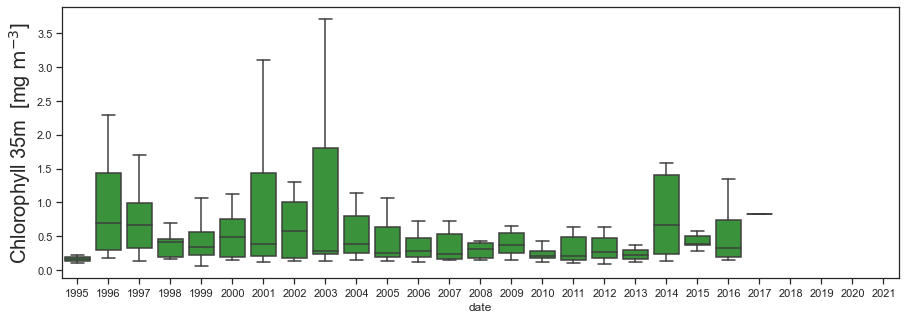

In [114]:
seaborn.boxplot(x=CARIACO.index.year, y=CARIACO.Chlorophyll_35m, color='tab:green', showfliers=False)
#plt.axvline(6, color='red')
plt.ylabel("Chlorophyll 35m  [mg $\mathrm{m^{-3}}$]", fontsize=20)

## Satellite Chlorophyll

Text(0, 0.5, 'Chlorophyll [mg $\\mathrm{m^{-3}}$]')

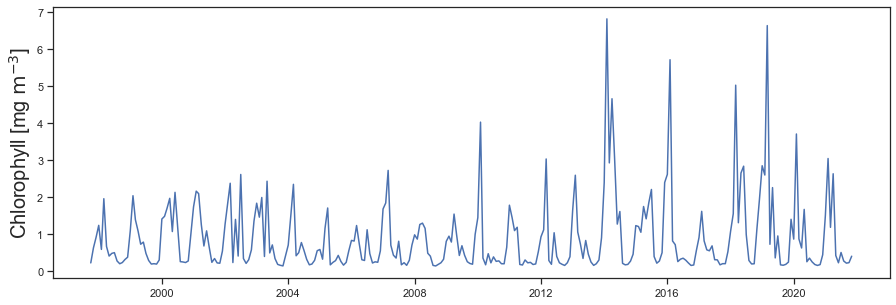

In [110]:
plt.plot(CARIACO.index, CARIACO.Satellite_chla)

plt.ylabel("Chlorophyll [mg $\mathrm{m^{-3}}$]", fontsize=20)

Text(0, 0.5, 'Chlorophyll [mg $\\mathrm{m^{-3}}$]')

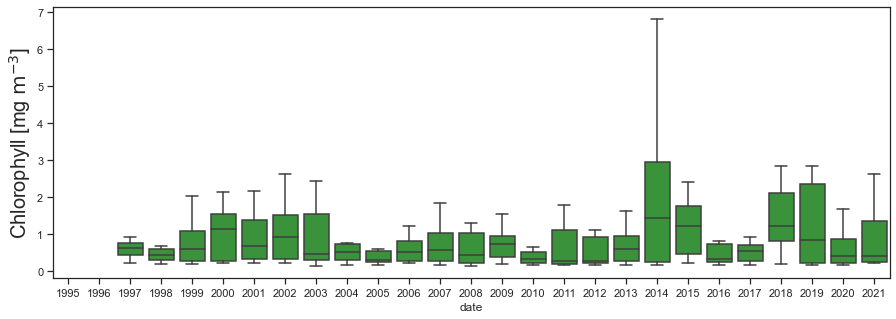

In [116]:
seaborn.boxplot(x=CARIACO.index.year, y=CARIACO.Satellite_chla, color='tab:green', showfliers=False)
#plt.axvline(6, color='red')
plt.ylabel("Chlorophyll [mg $\mathrm{m^{-3}}$]", fontsize=20)

## comparative statistics:

In [136]:
print("stat \t Niskin Chlorophyll \t Niskin top 35m Chlorophyll \t Satellite Chl")
print("MEAN: \t", np.mean(CARIACO.Chlorophyll), "\t",  np.mean(CARIACO.Chlorophyll_35m), "\t \t",  np.mean(CARIACO.Satellite_chla))
print("min: \t", np.min(CARIACO.Chlorophyll), "\t",  np.min(CARIACO.Chlorophyll_35m), "\t \t",  np.min(CARIACO.Satellite_chla))
print("max: \t", np.max(CARIACO.Chlorophyll), "\t",  np.max(CARIACO.Chlorophyll_35m), "\t \t",  np.max(CARIACO.Satellite_chla))
print("STD: \t", np.std(CARIACO.Chlorophyll), "\t",  np.std(CARIACO.Chlorophyll_35m), "\t \t",  np.std(CARIACO.Satellite_chla))

stat 	 Niskin Chlorophyll 	 Niskin top 35m Chlorophyll 	 Satellite Chl
MEAN: 	 0.36911085861747656 	 0.6811773524429344 	 	 0.9093057525138322
min: 	 0.102668736525596 	 0.0582406040551432 	 	 0.149088566874464
max: 	 2.17852293618867 	 5.30635503888851 	 	 6.82079937104826
STD: 	 0.32638580677524526 	 0.8750002203210039 	 	 0.9949448207798929


# VIF (variance inflation factor)

In [142]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [153]:
ERA5clean = ERA5.drop('year', axis=1)._get_numeric_data().dropna()
ERA5clean.head()

,cdww,iews,inss,mcc,mwp,si10,sp,sst,t2m,tauoc,...,lsp,magss,mer,metss,mmtss,mntss,mtpr,nsss,sshf,tp
date,,,,,,,,,,,,,,,,,,,,,
1995-11-01,0.000912,-0.054353,-0.025692,0.097103,5.124629,6.113998,101075.125,300.71152,299.72668,0.978549,...,0.000208,6192.3228,-0.000041,-0.063720,0.071691,-0.028754,1.188099e-05,-2488.6484,-668755.0,0.001027
1995-12-01,0.000934,-0.057572,-0.031501,0.071477,5.149414,6.504798,101168.125,299.28598,298.87793,0.975202,...,0.000056,6760.8560,-0.000030,-0.067293,0.078194,-0.035218,1.320477e-06,-3042.9258,-253528.0,0.000115
1996-01-01,0.000979,-0.068143,-0.037201,0.076384,5.239093,7.016142,101168.810,298.53207,298.06640,0.967328,...,0.000066,7976.0273,-0.000034,-0.079299,0.092283,-0.041197,1.670900e-06,-3556.2266,-272642.0,0.000143
1996-02-01,0.001028,-0.085607,-0.047099,0.079045,4.748802,7.786757,101173.690,298.30145,298.15515,0.958666,...,0.000043,9619.2580,-0.000031,-0.095999,0.111392,-0.050238,6.747709e-07,-4342.0900,-12840.0,0.000059
1996-03-01,0.001057,-0.096076,-0.052923,0.067093,4.762285,8.154397,101191.125,297.70407,297.81580,0.954383,...,0.000026,10874.3240,-0.000028,-0.108240,0.125832,-0.057302,4.256869e-07,-4947.4844,258676.0,0.000038


In [163]:
ERA5clean.columns 

Index(['cdww', 'iews', 'inss', 'mcc', 'mwp', 'si10', 'sp', 'sst', 't2m',
       'tauoc', 'u10', 'ust', 'v10', 'v10n', 'vst', 'wind', 'cdir', 'e',
       'ewss', 'i10fg', 'lsp', 'magss', 'mer', 'metss', 'mmtss', 'mntss',
       'mtpr', 'nsss', 'sshf', 'tp'],
      dtype='object')

In [165]:
#%%capture
#gather features
features = "+".join(ERA5clean.columns[1:])
# get y and X dataframes based on this regression:
y, X = dmatrices('cdww ~' + features, ERA5clean, return_type='dataframe')

In [186]:
compdict = {a:b for a, b in zip(ERA5meta.GRIB_cfVarName,ERA5meta.GRIB_name)}

In [184]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif["name"] = vif["features"].map(compdict)

In [185]:
vif.round(1).sort_values(by="VIF Factor")

,VIF Factor,features,name
3,2.5,mcc,Medium cloud cover
4,3.3,mwp,Mean wave period
6,3.6,sp,Surface pressure
16,4.0,cdir,Clear-sky direct solar radiation at surface
20,7.0,lsp,Large-scale precipitation
28,113.0,sshf,Surface sensible heat flux
8,564.9,t2m,2 metre temperature
9,627.1,tauoc,Normalized stress into ocean
14,915.6,vst,V-component stokes drift
10,1109.2,u10,10 metre U wind component


In [187]:
ERA5sub = ERA5clean[['mcc', 'mwp', 'sp', 'cdir', 'sst', 'wind', 'tp', 'e']]

In [194]:
#%%capture
#gather features
features2 = "+".join(ERA5sub.columns[1:])
# get y and X dataframes based on this regression:
y2, X2 = dmatrices('mcc ~' + features2, ERA5sub, return_type='dataframe')

In [195]:
# For each X, calculate VIF and save in dataframe
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif2["features"] = X2.columns
vif2["name"] = vif2["features"].map(compdict)

In [196]:
vif2.round(1)

,VIF Factor,features,name
0,4101528.3,Intercept,NaN
1,2.0,mwp,Mean wave period
2,2.3,sp,Surface pressure
3,1.9,cdir,Clear-sky direct solar radiation at surface
4,30.3,sst,Sea surface temperature
5,17.4,wind,10 metre wind speed
6,1.9,tp,Total precipitation
7,11.4,e,Evaporation


### let's try automatic selection

In [209]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.datasets import load_iris

#iris = load_iris()
#X = iris.data
#y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

In [219]:
from sklearn.model_selection import train_test_split

In [226]:
Sat_Subset = CARIACO[['cdww', 'iews', 'inss', 'mcc', 'mwp', 'si10', 'sp', 'sst', 't2m',
       'tauoc', 'u10', 'ust', 'v10', 'v10n', 'vst', 'wind', 'cdir', 'e',
       'ewss', 'i10fg', 'lsp', 'magss', 'mer', 'metss', 'mmtss', 'mntss',
       'mtpr', 'nsss', 'sshf', 'tp', 'Satellite_chla']].dropna()

X = Sat_Subset.drop('Satellite_chla', axis=1)
y = Sat_Subset['Satellite_chla']

In [227]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=12)

In [290]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.linear_model import LinearRegression
LR = LinearRegression()

sfs1 = SFS(estimator=LR, 
    k_features=5, 
    forward=False, 
    floating=True, 
    scoring='neg_mean_squared_error',
    cv = 0,
    n_jobs = -1)


sfs1 = sfs1.fit(X, y, custom_feature_names=tuple(X.columns.map(compdict).values))

In [291]:
sfs1.k_score_

-0.3477291678836834

In [292]:
sfs1.k_feature_idx_

(7, 8, 14, 16, 28)

In [293]:
sfs1.k_feature_names_

('Sea surface temperature',
 '2 metre temperature',
 'V-component stokes drift',
 'Clear-sky direct solar radiation at surface',
 'Surface sensible heat flux')

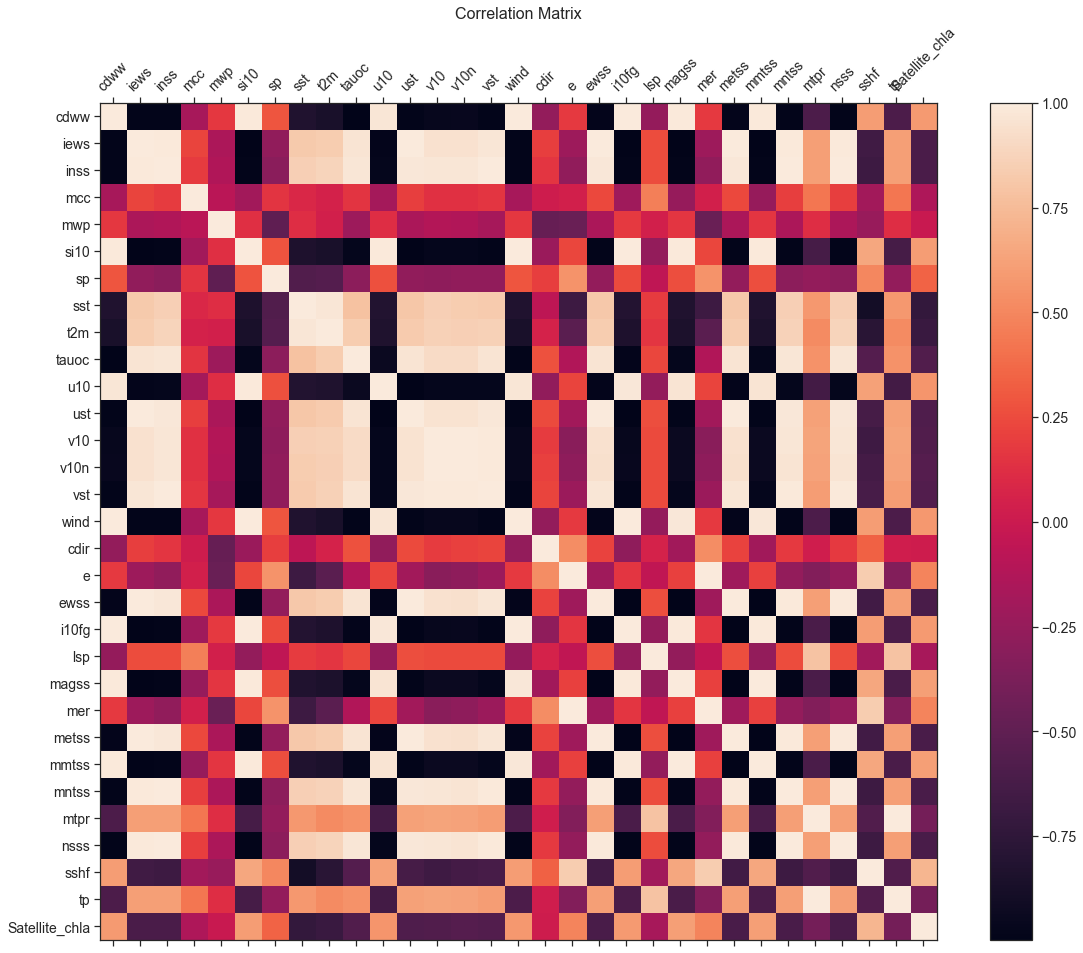

In [296]:

df = Sat_Subset
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# BRT

# GAMLSS